# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [40]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [12]:
house = pd.read_csv('housing.csv')

house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [21]:
numeric_house = house.iloc[:, :-1] 

In [22]:
correlation_matrix = numeric_house.corr()

correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


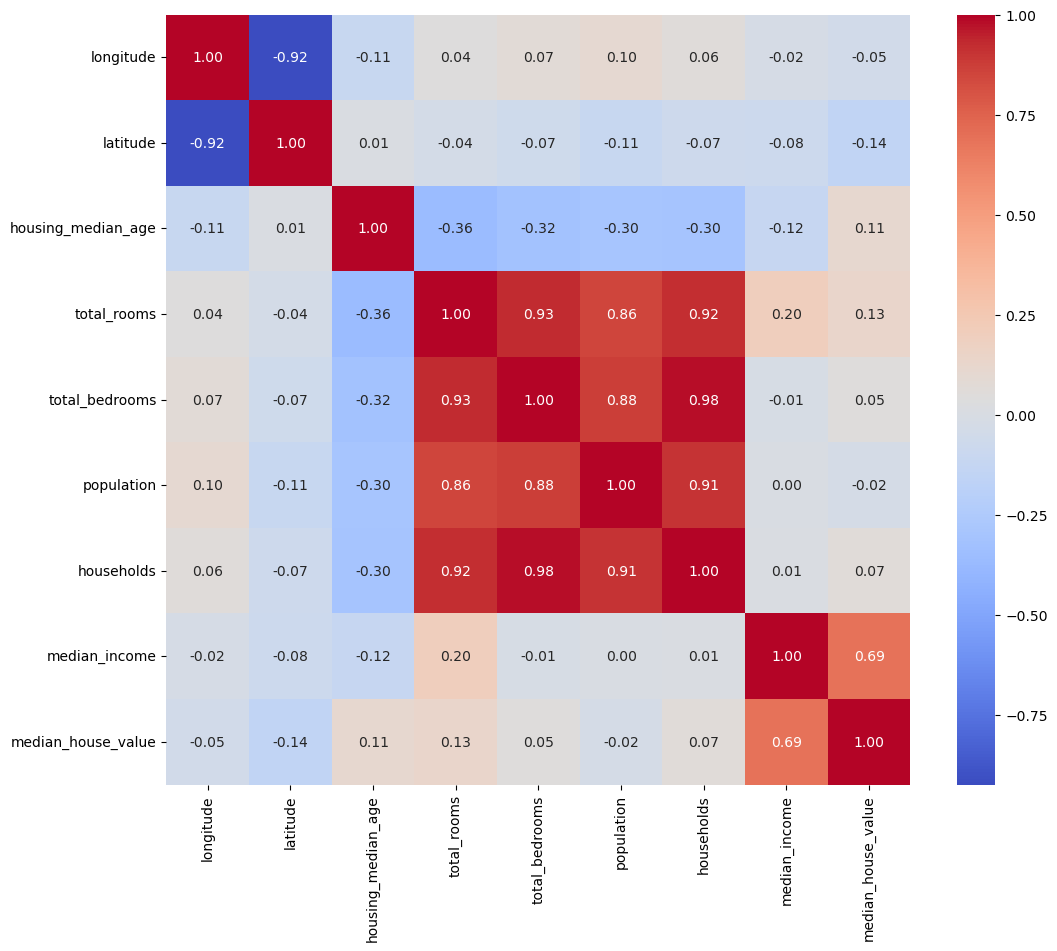

In [23]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### 3. Separe os dados em validação e teste

In [27]:
features = numeric_house[['median_income', 'total_rooms', 'total_bedrooms', 'households', 'population']]
target = numeric_house['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [31]:
tree_depth_8 = DecisionTreeRegressor(max_depth=8)
tree_depth_2 = DecisionTreeRegressor(max_depth=2)

In [32]:
tree_depth_8.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [33]:
tree_depth_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [37]:
# Previsões para a base de treinamento
y_train_pred_depth_8 = tree_depth_8.predict(X_train)
y_train_pred_depth_2 = tree_depth_2.predict(X_train)

# Previsões para a base de testes
y_test_pred_depth_8 = tree_depth_8.predict(X_test)
y_test_pred_depth_2 = tree_depth_2.predict(X_test)

# Cálculo do MSE para a base de treinamento
mse_train_depth_8 = mean_squared_error(y_train, y_train_pred_depth_8)
mse_train_depth_2 = mean_squared_error(y_train, y_train_pred_depth_2)

# Cálculo do MSE para a base de testes
mse_test_depth_8 = mean_squared_error(y_test, y_test_pred_depth_8)
mse_test_depth_2 = mean_squared_error(y_test, y_test_pred_depth_2)

# Exibindo os resultados
print(f"MSE para árvore de profundidade 8 (treinamento): {mse_train_depth_8}")
print(f"MSE para árvore de profundidade 2 (treinamento): {mse_train_depth_2}")
print(f"MSE para árvore de profundidade 8 (teste): {mse_test_depth_8}")
print(f"MSE para árvore de profundidade 2 (teste): {mse_test_depth_2}")

MSE para árvore de profundidade 8 (treinamento): 4976711613.570994
MSE para árvore de profundidade 2 (treinamento): 7322649755.801524
MSE para árvore de profundidade 8 (teste): 6643619945.538221
MSE para árvore de profundidade 2 (teste): 7530620161.037151


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

 - Com base nesses resultados, a árvore de profundidade 8 parece ser a mais adequada, pois oferece um equilíbrio melhor entre ajuste aos dados de treinamento e generalização para os dados de teste. 

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

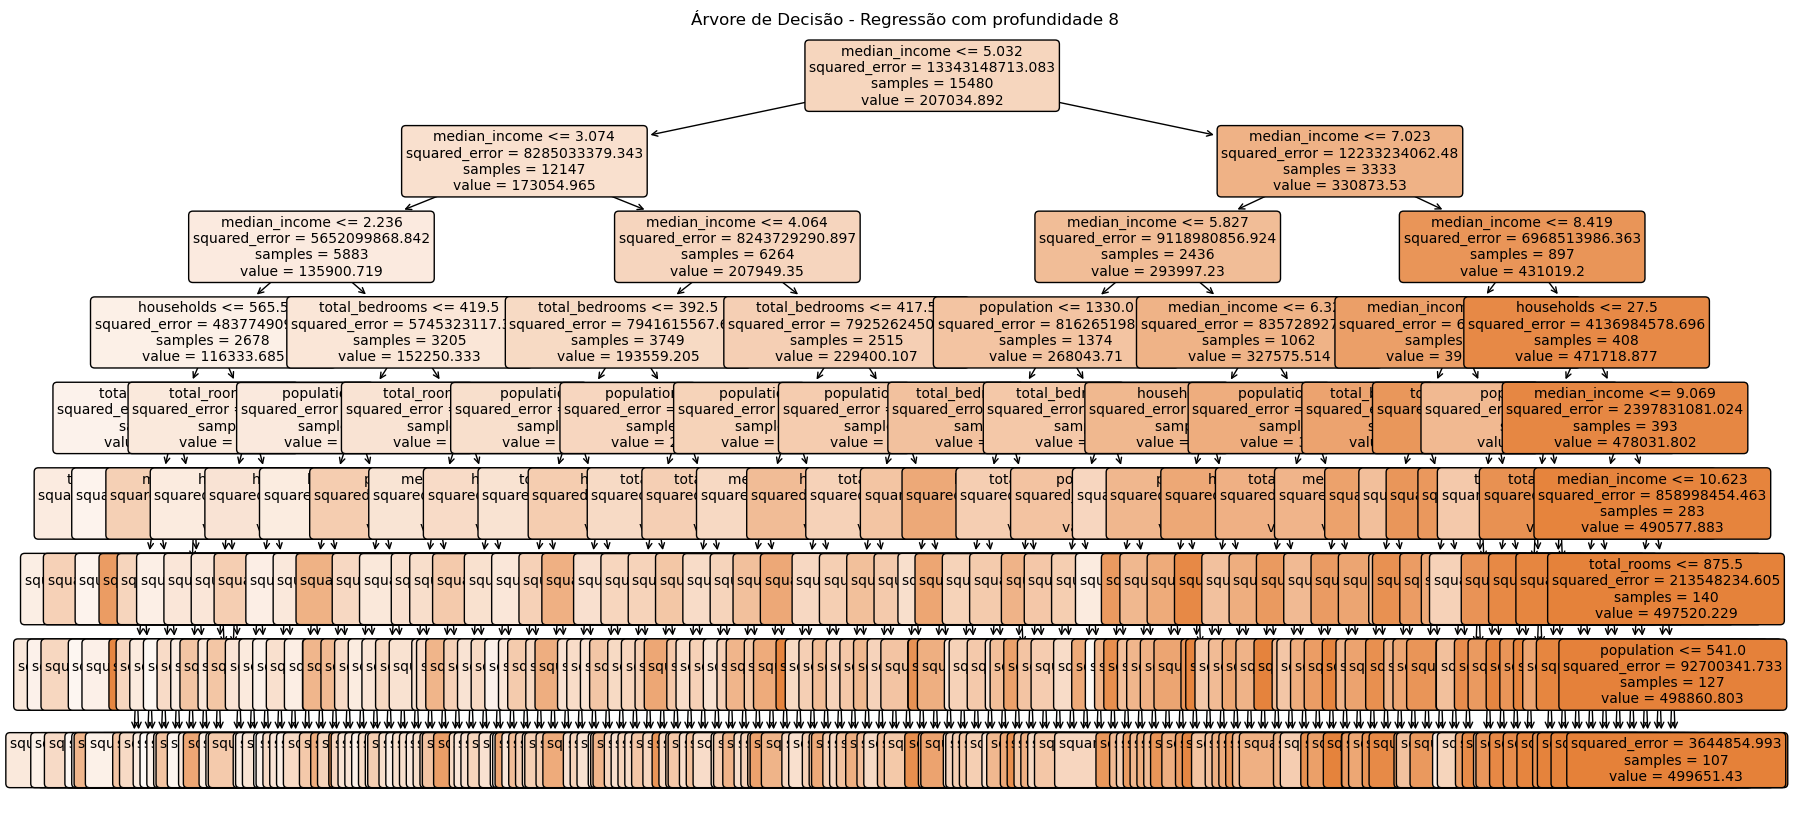

In [45]:
feature_names = X_train.columns.tolist()  

# Plotando a árvore
plt.figure(figsize=(20, 10))
plot_tree(tree_depth_8, 
          feature_names=feature_names,  
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title("Árvore de Decisão - Regressão com profundidade 8")
plt.show()